In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score

# Cadre est binaire (0 / 1) alors on utilise une régression logistique, pas une régression linéaire classique.

In [7]:
df = pd.read_csv("Salaries.csv")
df["SalaireK"] = df["Salaire"] / 1000
y = df["Cadre"]

# Variables explicatives

In [ ]:
X_full = df[["SalaireK", "Education", "Anciennete", "Minorite", "Genre"]]
X_full = sm.add_constant(X_full)  

In [10]:
# Ajustement du modèle logistique complet
model_full = sm.Logit(y, X_full)
res_full = model_full.fit()
print(res_full.summary2())

Optimization terminated successfully.
         Current function value: 0.101932
         Iterations 10
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Cadre            Pseudo R-squared: 0.782     
Date:               2025-11-30 18:53 AIC:              108.6317  
No. Observations:   474              BIC:              133.5990  
Df Model:           5                Log-Likelihood:   -48.316   
Df Residuals:       468              LL-Null:          -221.43   
Converged:          1.0000           LLR p-value:      1.1393e-72
No. Iterations:     10.0000          Scale:            1.0000    
-----------------------------------------------------------------
                Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
const          -21.4120   3.7422 -5.7218 0.0000 -28.7465 -14.0774
SalaireK         0.1973   0.0331  5.9706 0.0000   0.1326   0.2621

In [11]:
# Probabilités prédites et classes prédites (seuil 0.5)
p_full = res_full.predict(X_full)
y_pred_full = (p_full >= 0.5).astype(int)

print("Accuracy modèle complet :", accuracy_score(y, y_pred_full))
print("Matrice de confusion (modèle complet) :")
print(confusion_matrix(y, y_pred_full))

Accuracy modèle complet : 0.959915611814346
Matrice de confusion (modèle complet) :
[[384   6]
 [ 13  71]]


# Modèle réduit (variables utiles)

In [17]:
# Modèle reduit : Salaire + Education
X_red = df[["SalaireK", "Education"]]
X_red = sm.add_constant(X_red)

model_red = sm.Logit(y, X_red)
res_red = model_red.fit()
print(res_red.summary2())

# Qualité de prédiction
p_red = res_red.predict(X_red)
y_pred_red = (p_red >= 0.5).astype(int)

print("AIC modele complet :", res_full.aic)
print("AIC modele reduit  :", res_red.aic)
print("BIC modele complet :", res_full.bic)
print("BIC modele reduit  :", res_red.bic)

print("Accuracy modele reduit :", accuracy_score(y, y_pred_red))
print("Matrice de confusion (modele reduit) :")
print(confusion_matrix(y, y_pred_red))      

Optimization terminated successfully.
         Current function value: 0.109128
         Iterations 10
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Cadre            Pseudo R-squared: 0.766     
Date:               2025-12-01 10:33 AIC:              109.4537  
No. Observations:   474              BIC:              121.9374  
Df Model:           2                Log-Likelihood:   -51.727   
Df Residuals:       471              LL-Null:          -221.43   
Converged:          1.0000           LLR p-value:      1.9972e-74
No. Iterations:     10.0000          Scale:            1.0000    
------------------------------------------------------------------
            Coef.    Std.Err.     z     P>|z|    [0.025    0.975] 
------------------------------------------------------------------
const      -19.5239    3.4480  -5.6624  0.0000  -26.2818  -12.7660
SalaireK     0.1891    0.0298   6.3526  0.0000    0.1308    0

En supprimant Anciennete, Minorite et Genre

# Interprétation du modèle final


In [13]:
import numpy as np
np.exp(res_red.params)

const        3.317978e-09
SalaireK     1.208178e+00
Education    1.957676e+00
dtype: float64

Pour SalaireK : OR = 1,20
à scolarité égale, +1000 $ de salaire multiplie les chances d’être cadre par 1,20 (+20 %).

Pour Education : OR = 1,96
à salaire égal, une année d’étude supplémentaire multiplie les chances d’être cadre par = 2

Donc le statut de cadre est très fortement associé au niveau de salaire et au niveau d’étude,

une fois qu’on tient compte de ces deux variables, l’effet de Genre, Minorite et Anciennete devient faible ou non significatif.

# TEST

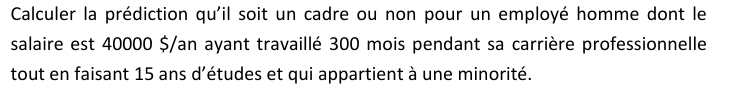

In [16]:
new_emp = pd.DataFrame({
    "const": [1],
    "SalaireK": [40000 / 1000],
    "Education": [15]
})

# On ajoute l'intercept
new_emp = sm.add_constant(new_emp)

# Selon le modèle réduit
p_new = res_red.predict(new_emp)
print("Probabilite d'etre cadre :", float(p_new))
print("Prediction (0/1) :", int(p_new >= 0.5))


Probabilite d'etre cadre : 0.13204648449078768
Prediction (0/1) : 0


C:\Users\ahmed\AppData\Local\Temp\ipykernel_7996\3744015148.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("Probabilite d'etre cadre :", float(p_new))
C:\Users\ahmed\AppData\Local\Temp\ipykernel_7996\3744015148.py:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Prediction (0/1) :", int(p_new >= 0.5))
